In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [3]:
iris = load_iris()
X, y = load_iris(return_X_y = True)
#X, y = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.70)

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:, 1],
                     'petallength': iris.data[:, 2], 'petalwidth': iris.data[:, 3],
                     'species': iris.target})

In [6]:
print(data.head())

   sepallength  sepalwidth  petallength  petalwidth  species
0          5.1         3.5          1.4         0.2        0
1          4.9         3.0          1.4         0.2        0
2          4.7         3.2          1.3         0.2        0
3          4.6         3.1          1.5         0.2        0
4          5.0         3.6          1.4         0.2        0


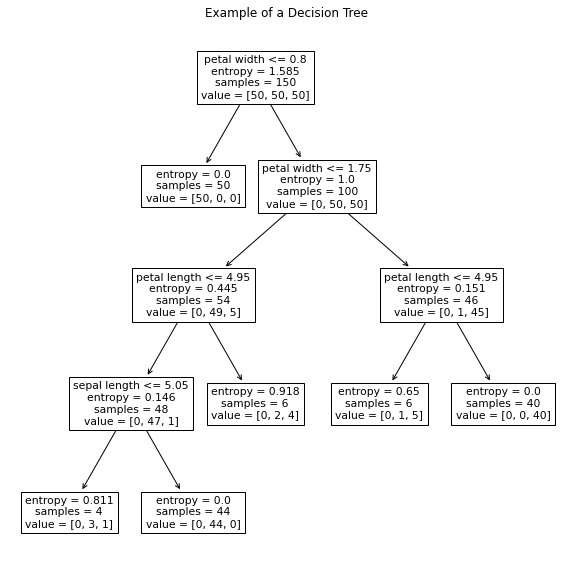

In [8]:
#build decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to iris dataset
clf.fit(X,y)

#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.title('Example of a Decision Tree')
plt.show()

In [13]:
# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = rf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("Accuracy of the model : ", metrics.accuracy_score(y_test, y_pred))


Accuracy of the model :  0.9428571428571428


In [14]:
feature_imp = pd.Series(rf.feature_importances_, index = iris.feature_names).sort_values(ascending = False)
feature_imp

petal length (cm)    0.475694
petal width (cm)     0.384393
sepal length (cm)    0.109323
sepal width (cm)     0.030590
dtype: float64

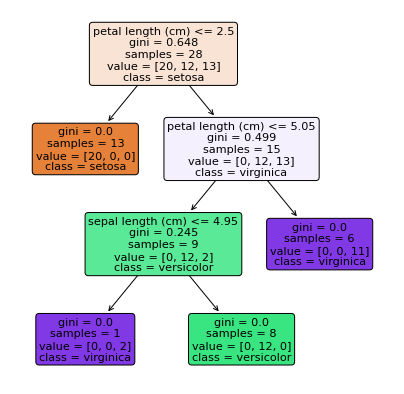

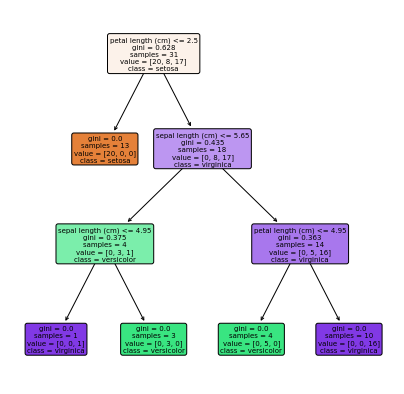

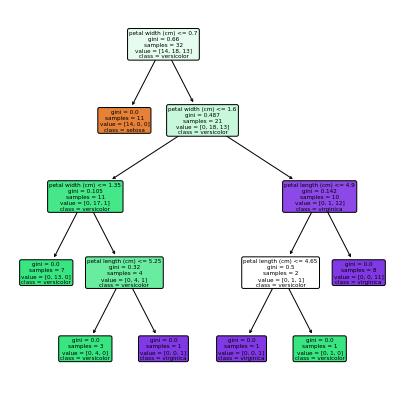

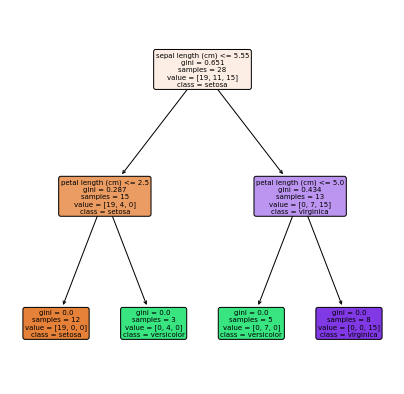

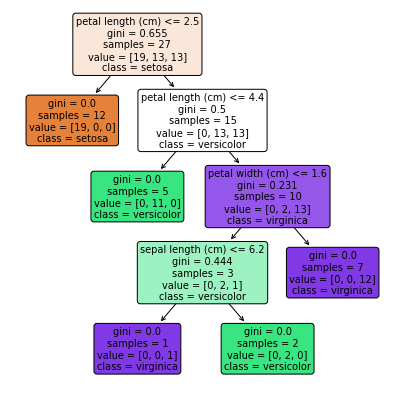

In [15]:
from sklearn.tree import plot_tree

#Details of first 5 trees:
for i in range(5):
    fig = plt.figure(figsize=(7, 7))
    plot_tree(rf.estimators_[i], 
              feature_names=iris.feature_names,
              class_names=iris.target_names, 
              filled=True, impurity=True, 
              rounded=True)